---
title: "historic Cleaning"
subtitle: "A DSAN Scholarship Project"
author: "Kangheng Liu"
date: last-modified
date-format: long
format:
    html:
        theme:
            dark: 
                - cosmo
                - style/html-sta313.scss
                - style/html-dark.scss
                - style/my-adjustments.scss
            light: 
                - cosmo
                - style/html-sta313.scss
        toc: true
        code-copy: true
        code-overflow: wrap
        mainfont: "Atkinson Hyperlegible"
        code-annotations: hover
        self-contained: true
execute:
    echo: true
    warning: false
    message: false
    freeze: auto
filters:
    - openlinksinnewpage
lightbox: auto
---

In [17]:
import pandas as pd
import numpy as np

## historic Cleaning

In [18]:
# Load in data

historic = pd.read_csv('../data/NABR_historic.csv')
nearterm = pd.read_csv('../data/nearterm_data_2020-2024.csv')

In [19]:
historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13821 entries, 0 to 13820
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   long                                    13821 non-null  float64
 1   lat                                     13821 non-null  float64
 2   year                                    13821 non-null  int64  
 3   TimePeriod                              13821 non-null  object 
 4   RCP                                     13821 non-null  object 
 5   scenario                                13821 non-null  object 
 6   treecanopy                              13821 non-null  int64  
 7   Ann_Herb                                13821 non-null  int64  
 8   Bare                                    13821 non-null  int64  
 9   Herb                                    13821 non-null  int64  
 10  Litter                                  13821 non-null  in

In [20]:
historic.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298


In [21]:
# Check for missing values for both datasets

historic.isnull().sum()

long                                         0
lat                                          0
year                                         0
TimePeriod                                   0
RCP                                          0
scenario                                     0
treecanopy                                   0
Ann_Herb                                     0
Bare                                         0
Herb                                         0
Litter                                       0
Shrub                                        0
DrySoilDays_Summer_whole                  9345
Evap_Summer                               9345
ExtremeShortTermDryStress_Summer_whole    9345
FrostDays_Winter                          9345
NonDrySWA_Summer_whole                    9368
PPT_Winter                                4368
PPT_Summer                                4368
PPT_Annual                                5891
T_Winter                                  4368
T_Summer     

In [22]:
nearterm.isnull().sum()

long                                          0
lat                                           0
year                                          0
TimePeriod                                    0
RCP                                           0
scenario                                      0
treecanopy                                    0
Ann_Herb                                      0
Bare                                          0
Herb                                          0
Litter                                        0
Shrub                                         0
DrySoilDays_Summer_whole                  37529
Evap_Summer                               37529
ExtremeShortTermDryStress_Summer_whole    37535
FrostDays_Winter                          37529
NonDrySWA_Summer_whole                    37630
PPT_Winter                                17920
PPT_Summer                                17920
PPT_Annual                                23802
T_Winter                                

In [23]:
# # Delete rows with missing values

# historic = historic.dropna()

# nearterm = nearterm.dropna()

# Check for duplicates

historic.duplicated().sum()

nearterm.duplicated().sum()

10

## EDA

In [24]:
# remove columns with type is string

historic = historic.select_dtypes(exclude=['object'])

nearterm = nearterm.select_dtypes(exclude=['object'])


<Axes: >

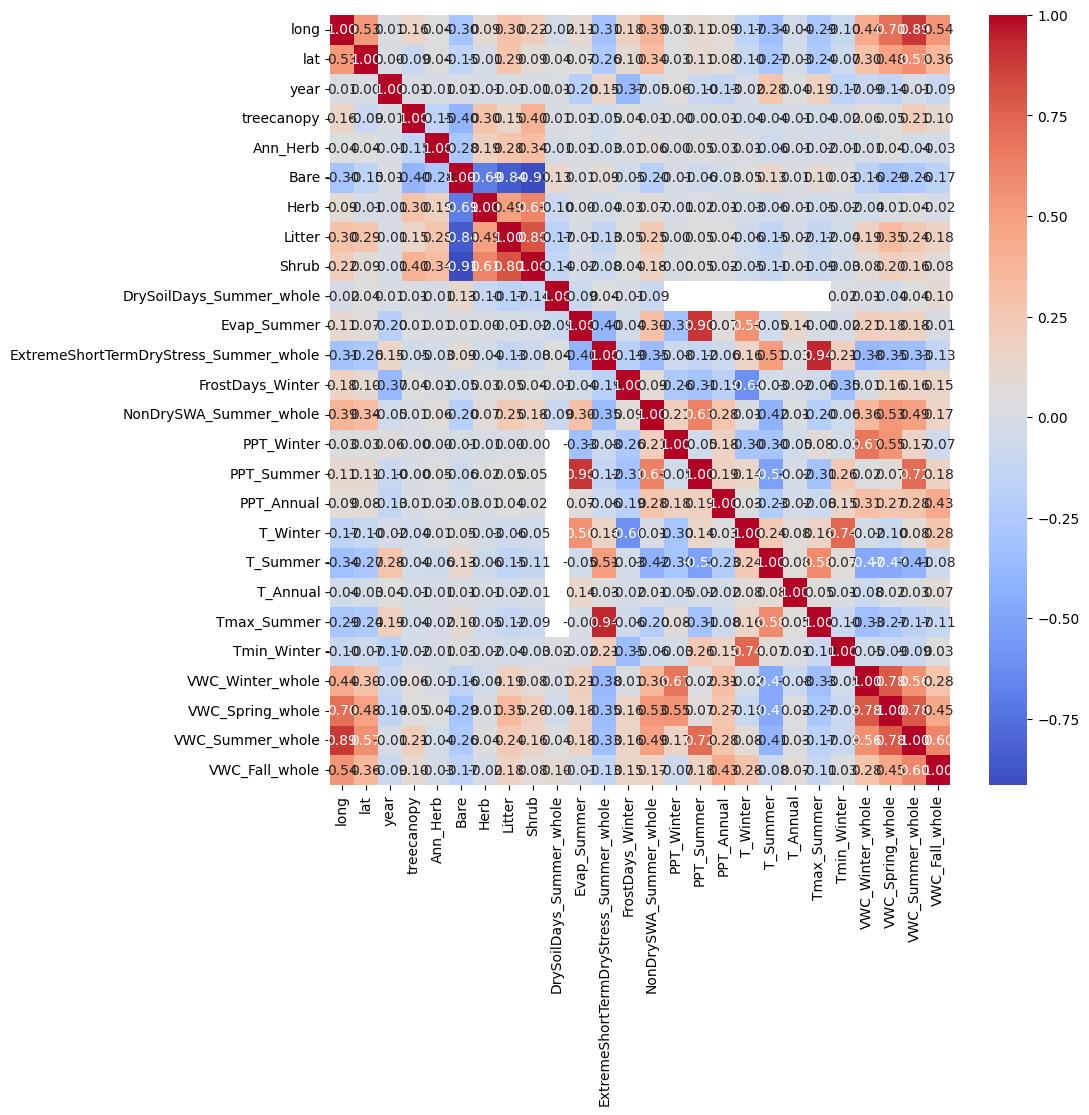

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a heatmap of the correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(historic.corr(), annot=True, cmap='coolwarm', fmt='.2f')

<Axes: >

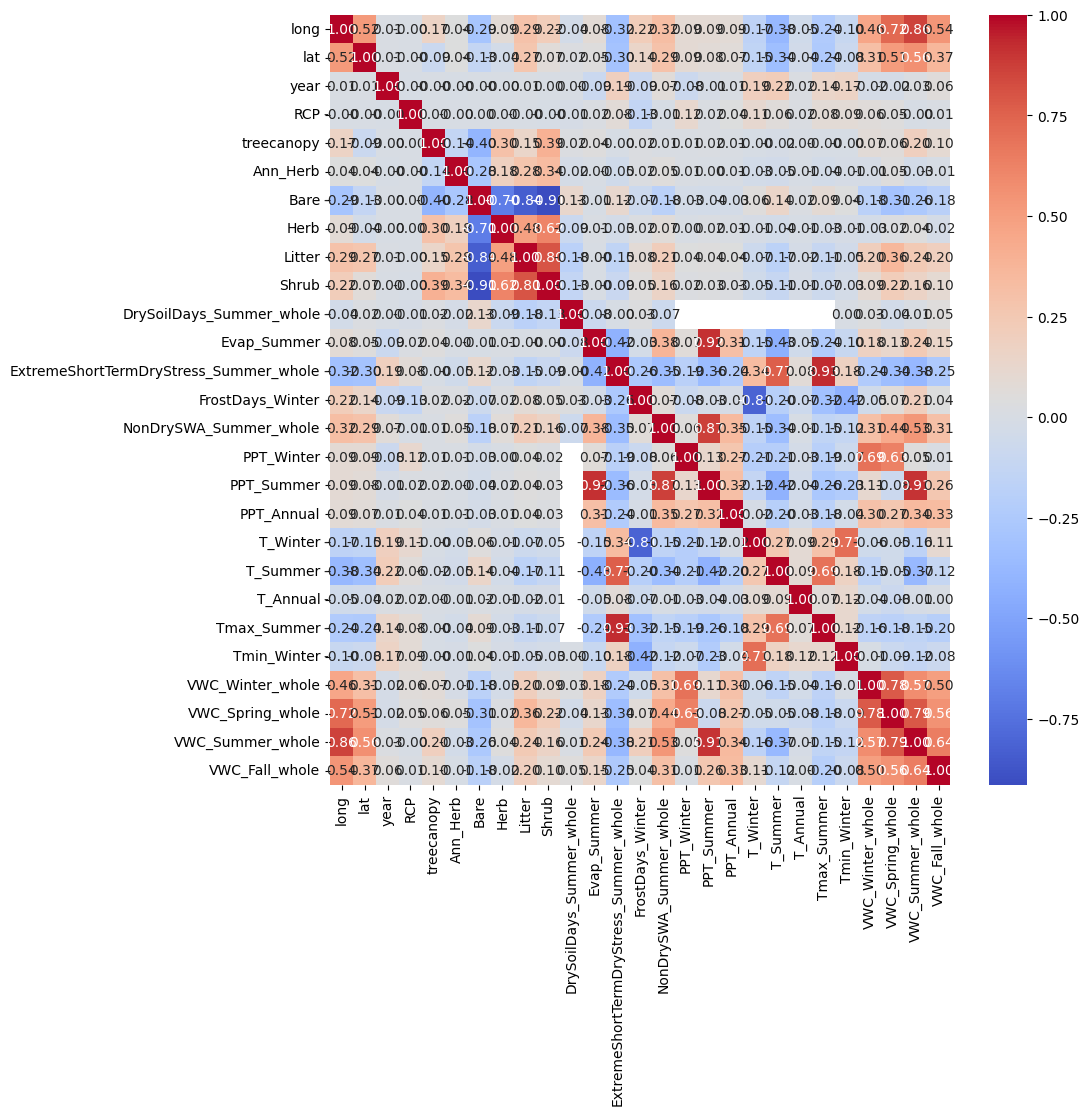

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a heatmap of the correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(nearterm.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [27]:
# what are the unique value pairs in the long and lat columns?

historic['long'].nunique(), historic['lat'].nunique()

# What is the min max range of the long and lat columns?

historic['long'].min(), historic['long'].max(), historic['lat'].min(), historic['lat'].max()


(-110.0472, -109.9659, 37.57034, 37.63476)

In [28]:
historic['year'].min(), historic['year'].max()
historic['year'].value_counts()
historic['year'].nunique()

39

<Axes: xlabel='year', ylabel='Evap_Summer'>

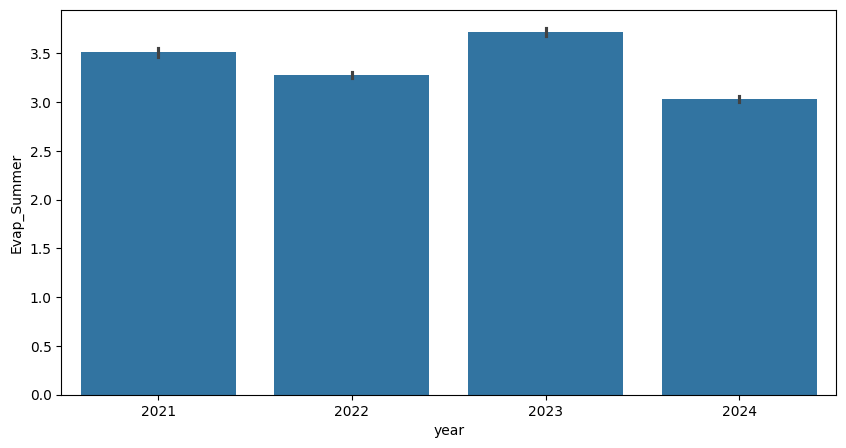

In [29]:
# plot bar plot of 'T_annual' column, x being years, and y being 'T_annual'

plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='Evap_Summer', data=nearterm)



In [30]:
# Where are we researching? 
import folium
from folium.plugins import MarkerCluster
import pandas as pd


# Create a map centered around an average location
m = folium.Map(location=[sum(historic["lat"]) / len(historic["lat"]), sum(historic["long"]) / len(historic["long"])], zoom_start=2)

# Add points to the map
for lat, long in zip(historic["lat"], historic["long"]):
    folium.Marker([lat, long]).add_to(m)

# Display the map
m.save('map.html')


In [31]:
history_unique = historic.drop_duplicates(subset=['long', 'lat'])

import pandas as pd
import json

# Convert DataFrame to GeoJSON
def history_unique_to_geojson(history_unique, properties, lat='lat', lon='long'):
    geojson = {'type': 'FeatureCollection', 'features': []}
    for _, row in history_unique.iterrows():
        feature = {
            'type': 'Feature',
            'properties': {},
            'geometry': {
                'type': 'Point',
                'coordinates': [],
            }
        }
        feature['geometry']['coordinates'] = [row[lon], row[lat]]
        for prop in properties:
            # feature['properties'][prop] = row[prop]
            continue
        geojson['features'].append(feature)
    return geojson

geojson_data = history_unique_to_geojson(history_unique, ['Name', 'Description'])
print(json.dumps(geojson_data, indent=2))

# Save the GeoJSON data to a file
with open('history_unique.geojson', 'w') as f:
    json.dump(geojson_data, f)


{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0472,
          37.60413
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0461,
          37.60334
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0458,
          37.60308
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0393,
          37.60519
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0389,
          37.60545
        ]
      }
    },
 

In [32]:
# for history_unique, normalize these four columns to be between 0 and 1: "Bare", "Herb", "Litter", "Shrub"

from sklearn.preprocessing import MinMaxScaler

history_unique = historic.drop_duplicates(subset=['long', 'lat', 'year'])

scaler = MinMaxScaler()

history_unique[["Bare", "Herb", "Litter", "Shrub"]] = scaler.fit_transform(history_unique[["Bare", "Herb", "Litter", "Shrub"]])

# Create a column called "dominant" that contains the name of the column with the highest value for the four columns

history_unique["dominant"] = history_unique[["Bare", "Herb", "Litter", "Shrub"]].idxmax(axis=1)

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_78617/3817257175.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  history_unique[["Bare", "Herb", "Litter", "Shrub"]] = scaler.fit_transform(history_unique[["Bare", "Herb", "Litter", "Shrub"]])
/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_78617/3817257175.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  history_unique["dominant"] = history_unique[["Bare", "Herb", "Litter", "Shrub"]].idxmax(axis=1)


In [33]:
# 

### Outputting vegatation kind data of the region over the years.

In [34]:
import pandas as pd
import json

# Convert DataFrame to GeoJSON
def history_unique_to_geojson(history_unique, properties, lat='lat', lon='long'):
    geojson = {'type': 'FeatureCollection', 'features': []}
    for _, row in history_unique.iterrows():
        feature = {
            'type': 'Feature',
            'properties': {},
            'geometry': {
                'type': 'Point',
                'coordinates': [],
            }
        }
        feature['geometry']['coordinates'] = [row[lon], row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

# Assuming history_unique is your DataFrame
# Ensure the 'dominant' column is included in the grouped DataFrame
history_unique_grouped = history_unique.groupby(["long", "lat"]).apply(lambda x: x['dominant'].value_counts().idxmax()).reset_index(name='dominant')

# Now call the function with the grouped DataFrame
geojson_data = history_unique_to_geojson(history_unique_grouped, ['dominant'])
print(json.dumps(geojson_data, indent=2))

# Save the GeoJSON data to a file
with open('history_unique_veg.geojson', 'w') as f:
    json.dump(geojson_data, f)


{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "dominant": "Bare"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0472,
          37.60413
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "dominant": "Bare"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0461,
          37.60334
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "dominant": "Bare"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0458,
          37.60308
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "dominant": "Bare"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -110.0393,
          37.60519
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
  

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_78617/3112484257.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  history_unique_grouped = history_unique.groupby(["long", "lat"]).apply(lambda x: x['dominant'].value_counts().idxmax()).reset_index(name='dominant')


### Outputting vegatation data changes over the years.
* Deprecated. The data is not useful for the project.

In [35]:
import pandas as pd
import json

# Convert DataFrame to GeoJSON
def history_unique_to_geojson(history_unique, properties, lat='lat', lon='long'):
    geojson = {'type': 'FeatureCollection', 'features': []}
    for _, row in history_unique.iterrows():
        feature = {
            'type': 'Feature',
            'properties': {},
            'geometry': {
                'type': 'Point',
                'coordinates': [],
            }
        }
        feature['geometry']['coordinates'] = [row[lon], row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

# Assuming history_unique is your DataFrame
# Group by 'year' and generate GeoJSON for each year
for year, group in history_unique.groupby('year'):
    # No need to group by 'long' or 'lat' now, directly get the most frequent 'dominant' for each location
    geojson_data = history_unique_to_geojson(group, ['PPT_Annual'])
    
    # Save each year's GeoJSON data to a file
    filename = f'history_unique_{year}.geojson'
    with open(filename, 'w') as f:
        json.dump(geojson_data, f)

    # Print the filename and year for confirmation
    print(f"Saved GeoJSON for year {year} to {filename}")


Saved GeoJSON for year 1980 to history_unique_1980.geojson
Saved GeoJSON for year 1981 to history_unique_1981.geojson
Saved GeoJSON for year 1982 to history_unique_1982.geojson
Saved GeoJSON for year 1983 to history_unique_1983.geojson
Saved GeoJSON for year 1984 to history_unique_1984.geojson
Saved GeoJSON for year 1985 to history_unique_1985.geojson
Saved GeoJSON for year 1986 to history_unique_1986.geojson
Saved GeoJSON for year 1987 to history_unique_1987.geojson
Saved GeoJSON for year 1988 to history_unique_1988.geojson
Saved GeoJSON for year 1989 to history_unique_1989.geojson
Saved GeoJSON for year 1990 to history_unique_1990.geojson
Saved GeoJSON for year 1991 to history_unique_1991.geojson
Saved GeoJSON for year 1992 to history_unique_1992.geojson
Saved GeoJSON for year 1993 to history_unique_1993.geojson
Saved GeoJSON for year 1994 to history_unique_1994.geojson
Saved GeoJSON for year 1995 to history_unique_1995.geojson
Saved GeoJSON for year 1996 to history_unique_1996.geojs

In [39]:
# In historic data, find the column with least amount of missing data
print(historic.shape)
print(historic.isnull().sum())

# In history_unique data, find the column with least amount of missing data
print(history_unique.shape)
print(history_unique.isnull().sum())

(13821, 26)
long                                         0
lat                                          0
year                                         0
treecanopy                                   0
Ann_Herb                                     0
Bare                                         0
Herb                                         0
Litter                                       0
Shrub                                        0
DrySoilDays_Summer_whole                  9345
Evap_Summer                               9345
ExtremeShortTermDryStress_Summer_whole    9345
FrostDays_Winter                          9345
NonDrySWA_Summer_whole                    9368
PPT_Winter                                4368
PPT_Summer                                4368
PPT_Annual                                5891
T_Winter                                  4368
T_Summer                                  4368
T_Annual                                  5891
Tmax_Summer                               4368
T

### Entrypoint plot. Data to be exported. [Done]

0    10.234207
1    10.782219
2    10.750009
3    11.179948
Name: T_Annual, dtype: float64
0    0.700000
1    0.873836
2    0.863618
3    1.000000
Name: T_Annual, dtype: float64


<Axes: xlabel='year', ylabel='T_Annual'>

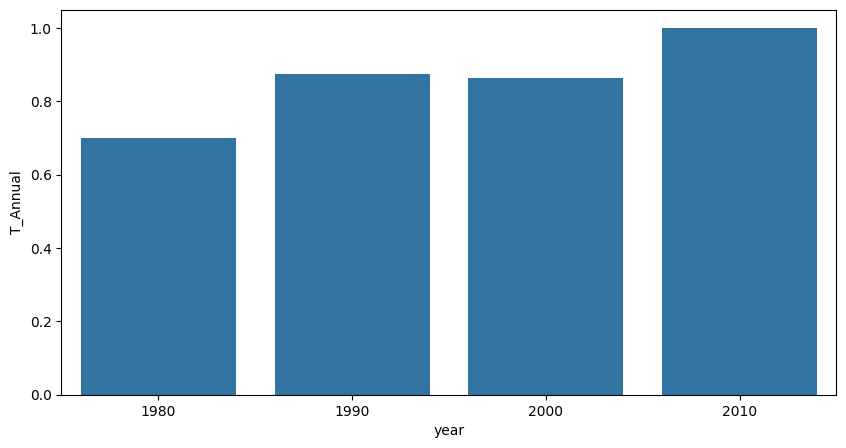

In [116]:
# plot bar plot of 'T_annual' column, x being years, and y being 'T_annual'

# plt.figure(figsize=(10, 5))
# sns.barplot(x='year', y='FrostDays_Winter', data=historic)

# merge 10 consecutives years as one bar and plot the bar plot

historic['year'] = historic['year'].apply(lambda x: x // 10 * 10)
historic = historic.groupby('year').mean().reset_index()

print(historic['T_Annual'])

# Normalize 'T_Annual' column to be between 0.7 and 1

historic['T_Annual'] = (historic['T_Annual'] - historic['T_Annual'].min()) / (historic['T_Annual'].max() - historic['T_Annual'].min()) * 0.3 + 0.7
print(historic['T_Annual'])

plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='T_Annual', data=historic)




::: {.warning}

This map.html will take long to load and is resource intensive.

:::

We are doing research in Natural Bridges National Monument's collected data.  

In [84]:
# now we will extract shapefile for this region and plot it on the map

import osmnx as ox
import folium

# Configure osmnx to use footprints (buildings, natural areas, etc.)
ox.config(use_cache=True, log_console=True)

# Specify the name of the area
place_name = "Natural Bridges National Monument, Utah"

# Fetch the area's polygon from OpenStreetMap
area = ox.geocode_to_gdf(place_name)

# Check and convert the coordinate system to WGS84 if necessary
area = area.to_crs(epsg=4326)

# Save the area to a GeoJSON file

area.to_file("area.geojson", driver="GeoJSON")



# Extract the geometry to use it in Folium
geometry = area.geometry.iloc[0]

# Create a Folium map centered around the area
m = folium.Map(location=[geometry.centroid.y, geometry.centroid.x], zoom_start=12)

# Add the area to the map
folium.GeoJson(data=area['geometry'], name='geojson').add_to(m)

# Add a layer control panel to turn layers on and off
folium.LayerControl().add_to(m)

# Display the map
m

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_17637/3807588921.py:7: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


### Process historic data to get rid of missing values

In [43]:
# get rid of the missing values in the 'T_Annual' column for historic data

historic = historic.dropna(subset=['T_Annual'])

In [44]:
import pandas as pd
import json

history_unique = historic.drop_duplicates(subset=['long', 'lat', 'year'])

# How many missing values in 'T_Annual' column for history_unique data?

history_unique['T_Annual'].isnull().sum()


0

In [45]:

# Convert DataFrame to GeoJSON
def history_unique_to_geojson(history_unique, properties, lat='lat', lon='long'):
    geojson = {'type': 'FeatureCollection', 'features': []}
    for _, row in history_unique.iterrows():
        feature = {
            'type': 'Feature',
            'properties': {},
            'geometry': {
                'type': 'Point',
                'coordinates': [],
            }
        }
        feature['geometry']['coordinates'] = [row[lon], row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

# Assuming history_unique is your DataFrame
# Group by 'year' and generate GeoJSON for each year
for year, group in history_unique.groupby('year'):
    # No need to group by 'long' or 'lat' now, directly get the most frequent 'dominant' for each location
    geojson_data = history_unique_to_geojson(group, ['T_Annual'])
    
    # Save each year's GeoJSON data to a file
    filename = f'history_unique_{year}.geojson'
    with open(filename, 'w') as f:
        json.dump(geojson_data, f)

    # Print the filename and year for confirmation
    print(f"Saved GeoJSON for year {year} to {filename}")


Saved GeoJSON for year 1980 to history_unique_1980.geojson
Saved GeoJSON for year 1981 to history_unique_1981.geojson
Saved GeoJSON for year 1982 to history_unique_1982.geojson
Saved GeoJSON for year 1983 to history_unique_1983.geojson
Saved GeoJSON for year 1984 to history_unique_1984.geojson
Saved GeoJSON for year 1985 to history_unique_1985.geojson
Saved GeoJSON for year 1986 to history_unique_1986.geojson
Saved GeoJSON for year 1987 to history_unique_1987.geojson
Saved GeoJSON for year 1988 to history_unique_1988.geojson
Saved GeoJSON for year 1989 to history_unique_1989.geojson
Saved GeoJSON for year 1990 to history_unique_1990.geojson
Saved GeoJSON for year 1991 to history_unique_1991.geojson
Saved GeoJSON for year 1992 to history_unique_1992.geojson
Saved GeoJSON for year 1993 to history_unique_1993.geojson
Saved GeoJSON for year 1994 to history_unique_1994.geojson
Saved GeoJSON for year 1995 to history_unique_1995.geojson
Saved GeoJSON for year 1996 to history_unique_1996.geojs